<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [26]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [27]:
missing = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [28]:
mean_value = df['JobSat'].mean()
df['JobSat'].fillna(mean_value)
remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(remote_mode, inplace=True)
missing = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Employment        0
JobSat        36311
RemoteWork        0
dtype: int64


C:\Users\YOGA 370\AppData\Local\Temp\ipykernel_6392\3615633386.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(remote_mode, inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             >20     8.0


C:\Users\YOGA 370\AppData\Local\Temp\ipykernel_6392\491409054.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
C:\Users\YOGA 370\AppData\Local\Temp\ipykernel_6392\491409054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='viridis')


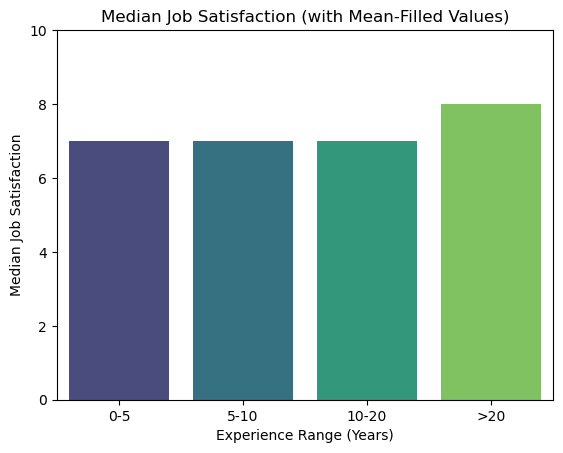

In [29]:
df_clean = df[['YearsCodePro', 'JobSat']].dropna()

df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean = df_clean.dropna()

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)
median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='viridis')
plt.title('Median Job Satisfaction (with Mean-Filled Values)')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.ylim(0, 10)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


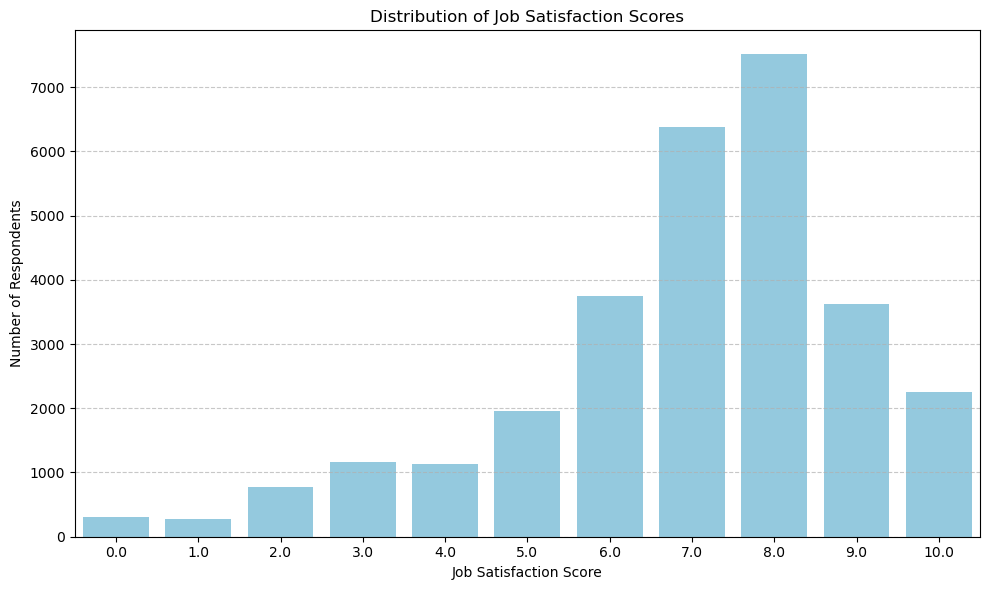

In [30]:
df_job_sat = df[df['JobSat'].notna()]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_job_sat, x='JobSat', color='skyblue')
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [52]:
top_employment = df['Employment'].value_counts().nlargest(10).index

df_top = df[df['Employment'].isin(top_employment)]
remote_vs_top_emp = pd.crosstab(df_top['Employment'], df_top['RemoteWork'], normalize='index') * 100
print(remote_vs_top_emp)


RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.302144   
Employed, full-time;Independent contractor, fre...                             37.391060   
Employed, full-time;Student, full-time                                         43.032330   
Employed, full-time;Student, part-time                                         40.762813   
Employed, part-time                                                            45.497630   
Independent contractor, freelancer, or self-emp...                             26.888155   
Not employed, but looking for work                                            100.000000   
Student, full-time                                                            100.000000   
Student, full-time;Employed, part-time                                         4

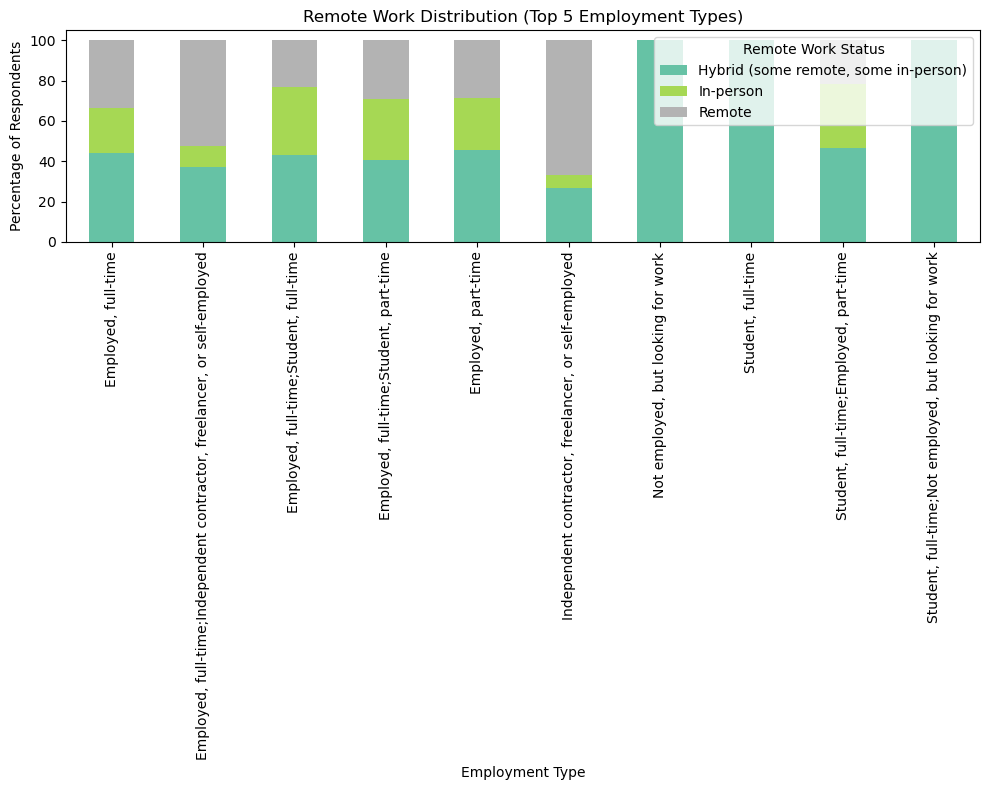

In [51]:
remote_vs_top_emp.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Set2')
plt.title('Remote Work Distribution (Top 5 Employment Types)')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()


In [53]:
df_branch = df[['RemoteWork', 'MainBranch']].dropna()
top_branches = df_branch['MainBranch'].value_counts().nlargest(5).index

df_branch = df_branch[df_branch['MainBranch'].isin(top_branches)]
remote_by_branch = pd.crosstab(df_branch['MainBranch'], df_branch['RemoteWork'], normalize='index') * 100
print(remote_by_branch)

RemoteWork                                          Hybrid (some remote, some in-person)  \
MainBranch                                                                                 
I am a developer by profession                                                 45.314398   
I am learning to code                                                          82.529032   
I am not primarily a developer, but I write cod...                             61.465213   
I code primarily as a hobby                                                    81.943611   
I used to be a developer by profession, but no ...                             63.774834   

RemoteWork                                          In-person     Remote  
MainBranch                                                                
I am a developer by profession                      17.322286  37.363316  
I am learning to code                               10.632258   6.838710  
I am not primarily a developer, but I write cod...  19.

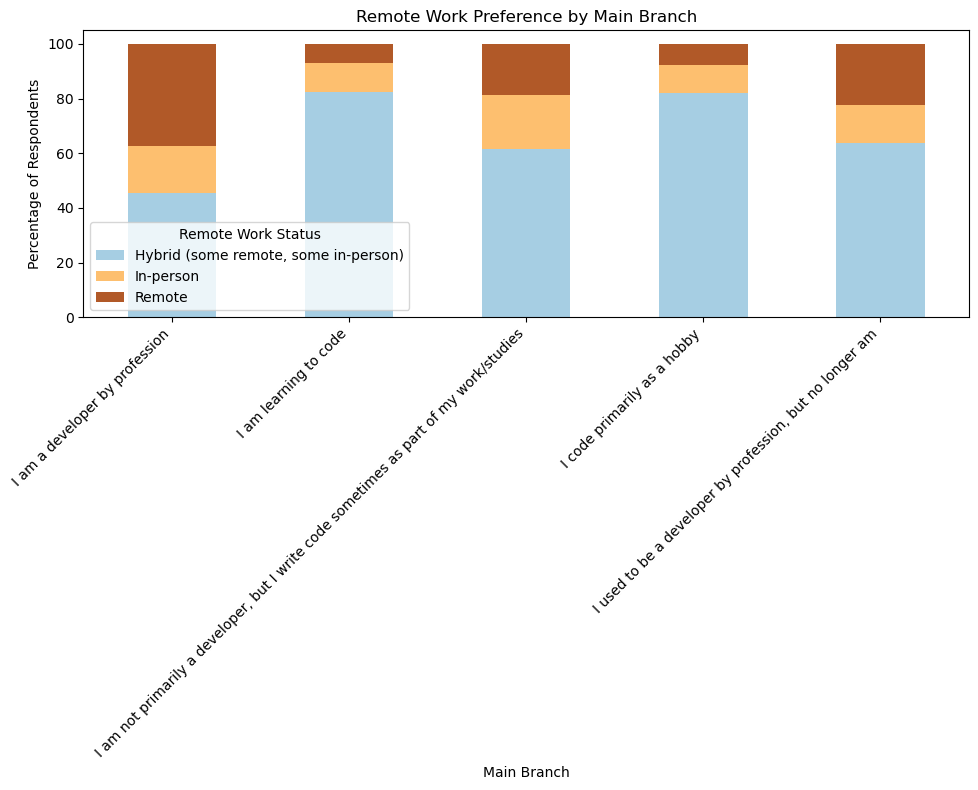

In [54]:

remote_by_branch.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 8))
plt.title('Remote Work Preference by Main Branch')
plt.xlabel('Main Branch')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


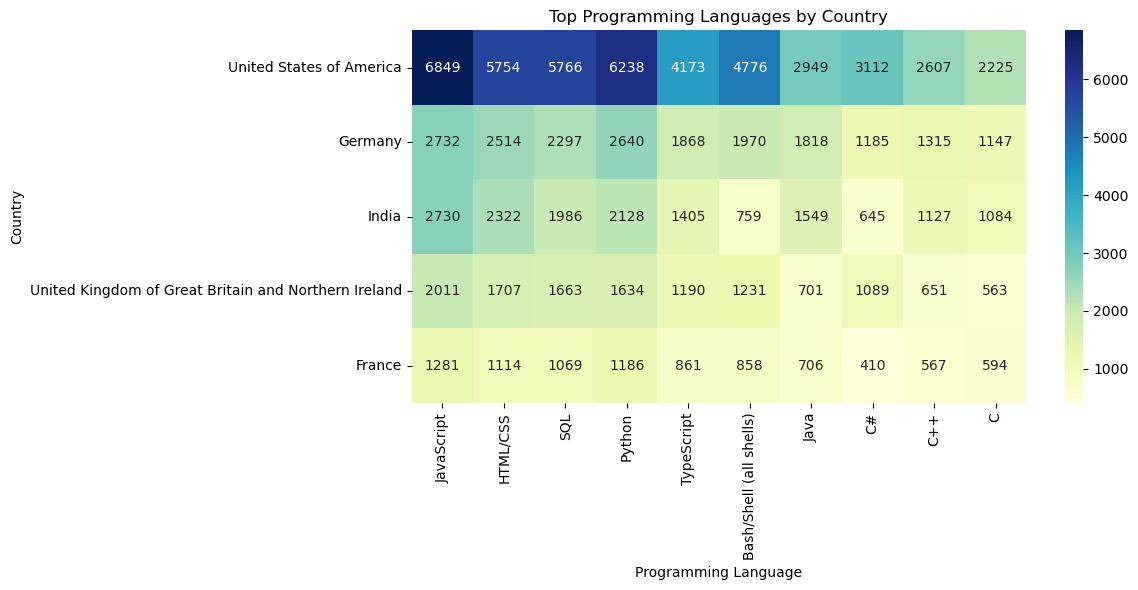

In [58]:
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('LanguageHaveWorkedWith')
language_counts = df_lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
language_pivot = language_counts.pivot(index='Country', columns='LanguageHaveWorkedWith', values='Count').fillna(0)
top_countries = df_lang_exploded['Country'].value_counts().nlargest(5).index
top_languages = df_lang_exploded['LanguageHaveWorkedWith'].value_counts().nlargest(10).index
filtered_data = language_pivot.loc[top_countries, top_languages]
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


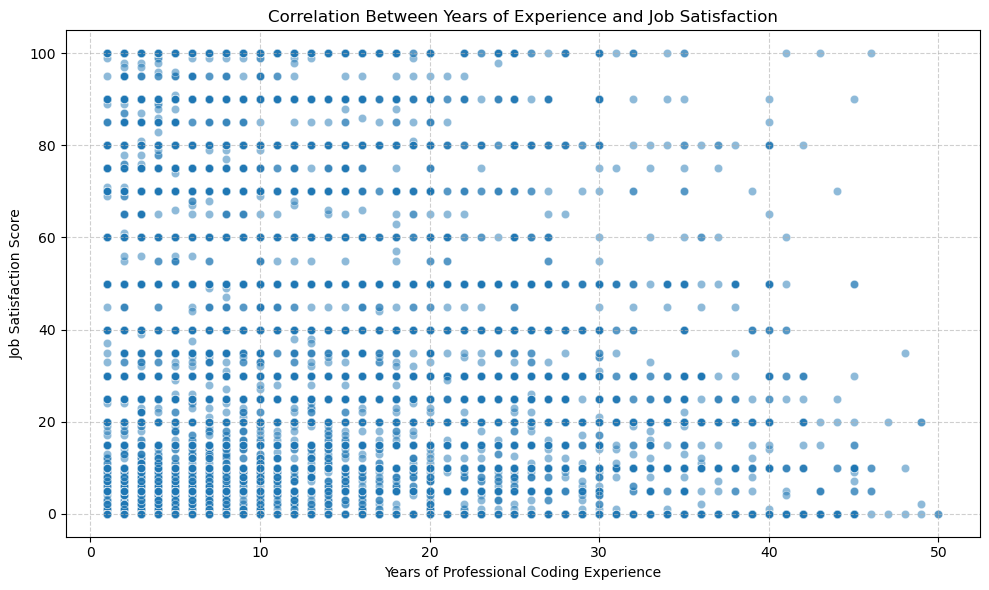

In [59]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [60]:
correlation = df_corr['YearsCodePro'].corr(df_corr['JobSatPoints_1'])
print(f'Correlation coefficient: {correlation:.3f}')


Correlation coefficient: -0.033


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [64]:
df_edu_emp = df[['EdLevel', 'Employment']].dropna()
edu_emp_percent = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'], normalize='index') * 100
print(edu_emp_percent)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.380322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

C:\Users\YOGA 370\AppData\Local\Temp\ipykernel_6392\3983595729.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


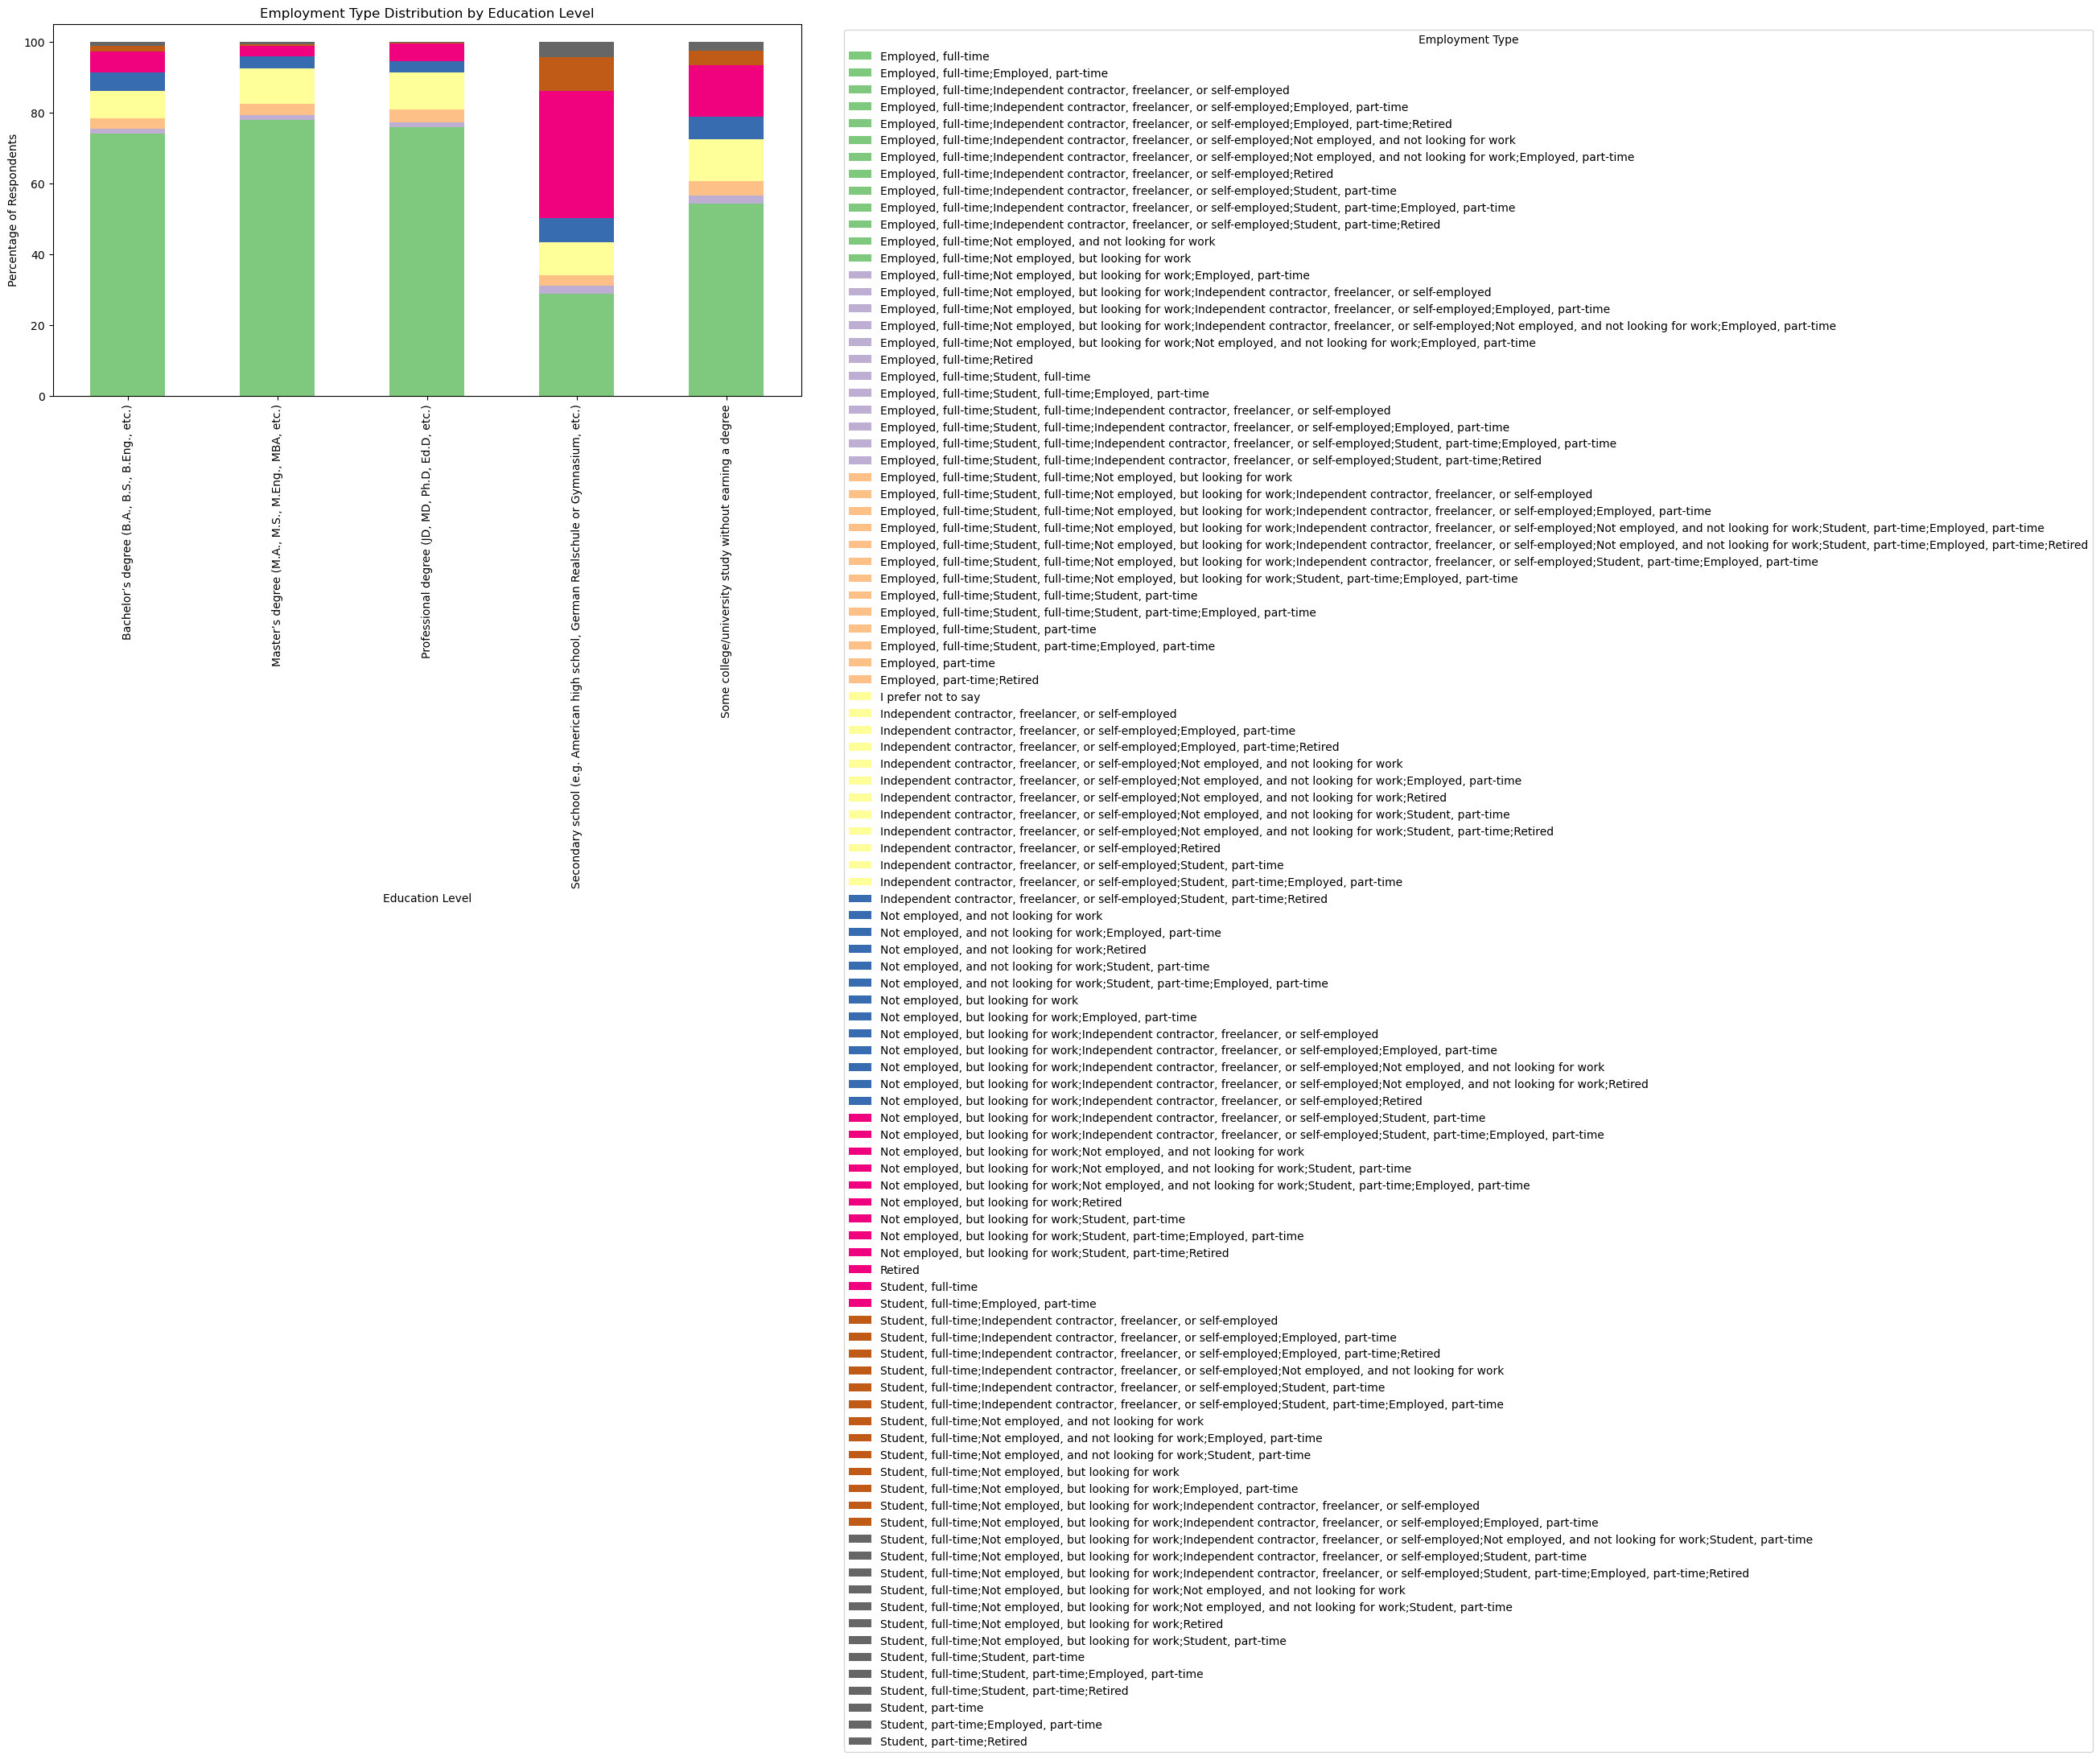

In [65]:
top_edu_levels = df_edu_emp['EdLevel'].value_counts().nlargest(5).index
df_top = df_edu_emp[df_edu_emp['EdLevel'].isin(top_edu_levels)]

edu_emp_top = pd.crosstab(df_top['EdLevel'], df_top['Employment'], normalize='index') * 100

edu_emp_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
df.to_csv('final_version.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
